In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
xls = pd.ExcelFile('ProblemCData.xlsx')
energy_data = pd.read_excel(xls, 'seseds')
variables = pd.read_excel(xls, 'msncodes')

In [20]:
energy_data.head()

,MSN,StateCode,Year,Data
0,ABICB,AZ,1960,0.0
1,ABICB,AZ,1961,0.0
2,ABICB,AZ,1962,0.0
3,ABICB,AZ,1963,0.0
4,ABICB,AZ,1964,0.0


In [21]:
energy_data['MSN'].nunique()

583

In [22]:
variables['MSN'].nunique()

605

In [4]:
variables.head()

,MSN,Description,Unit,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,ABICB,Aviation gasoline blending components consumed...,Billion Btu,NaN,NaN,NaN,NaN
1,ABICP,Aviation gasoline blending components consumed...,Thousand barrels,NaN,NaN,NaN,NaN
2,ARICB,Asphalt and road oil consumed by the industria...,Billion Btu,NaN,NaN,NaN,NaN
3,ARICD,Asphalt and road oil price in the industrial s...,Dollars per million Btu,NaN,NaN,NaN,NaN
4,ARICP,Asphalt and road oil consumed by the industria...,Thousand barrels,NaN,NaN,NaN,NaN


In [5]:
energy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105744 entries, 0 to 105743
Data columns (total 4 columns):
MSN          105744 non-null object
StateCode    105744 non-null object
Year         105744 non-null int64
Data         105744 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [6]:
variable_columns = energy_data['MSN'].unique()
variable_columns[:5]

array(['ABICB', 'ABICP', 'ARICB', 'ARICD', 'ARICP'], dtype=object)

In [7]:
energy_data['StateCode'].unique()

array(['AZ', 'CA', 'NM', 'TX'], dtype=object)

In [8]:
AZ_data = energy_data[energy_data['StateCode'] == 'AZ']
CA_data = energy_data[energy_data['StateCode'] == 'CA']
NM_data = energy_data[energy_data['StateCode'] == 'NM']
TX_data = energy_data[energy_data['StateCode'] == 'TX']

In [9]:
data = {}
data['AZ'] = AZ_data.pivot(index='Year', columns='MSN', values='Data')
data['TX'] = TX_data.pivot(index='Year', columns='MSN', values='Data')
data['CA'] = CA_data.pivot(index='Year', columns='MSN', values='Data')
data['NM'] = NM_data.pivot(index='Year', columns='MSN', values='Data')
data['AZ']

MSN,ABICB,ABICP,ARICB,ARICD,ARICP,ARICV,ARTCB,ARTCD,ARTCP,ARTCV,...,WWTXB,WWTXD,WWTXV,WXICB,WXICD,WXICP,WXICV,WYEGB,WYEGP,WYTCB
Year,,,,,,,,,,,,,,,,,,,,,
1960,0.00000,0.00000,5726.26021,NaN,862.90841,NaN,5726.26021,NaN,862.90841,NaN,...,3819.24697,NaN,NaN,0.00000,NaN,0.00000,NaN,0.0000,0.000,0.0000
1961,0.00000,0.00000,6274.82747,NaN,945.57376,NaN,6274.82747,NaN,945.57376,NaN,...,3715.21210,NaN,NaN,0.00000,NaN,0.00000,NaN,0.0000,0.000,0.0000
1962,0.00000,0.00000,5741.44510,NaN,865.19667,NaN,5741.44510,NaN,865.19667,NaN,...,3628.19694,NaN,NaN,0.00000,NaN,0.00000,NaN,0.0000,0.000,0.0000
1963,0.00000,0.00000,8193.88866,NaN,1234.76321,NaN,8193.88866,NaN,1234.76321,NaN,...,3937.01824,NaN,NaN,0.00000,NaN,0.00000,NaN,0.0000,0.000,0.0000
1964,0.00000,0.00000,7749.17493,NaN,1167.74788,NaN,7749.17493,NaN,1167.74788,NaN,...,4057.80989,NaN,NaN,0.00000,NaN,0.00000,NaN,0.0000,0.000,0.0000
1965,0.00000,0.00000,7369.23613,NaN,1110.49369,NaN,7369.23613,NaN,1110.49369,NaN,...,3695.21696,NaN,NaN,0.00000,NaN,0.00000,NaN,0.0000,0.000,0.0000
1966,0.00000,0.00000,12551.17339,NaN,1891.37634,NaN,12551.17339,NaN,1891.37634,NaN,...,3679.36818,NaN,NaN,0.00000,NaN,0.00000,NaN,0.0000,0.000,0.0000
1967,0.00000,0.00000,13390.92356,NaN,2017.92097,NaN,13390.92356,NaN,2017.92097,NaN,...,4180.13105,NaN,NaN,0.00000,NaN,0.00000,NaN,0.0000,0.000,0.0000
1968,0.00000,0.00000,15229.11009,NaN,2294.92316,NaN,15229.11009,NaN,2294.92316,NaN,...,4147.20373,NaN,NaN,0.00000,NaN,0.00000,NaN,0.0000,0.000,0.0000


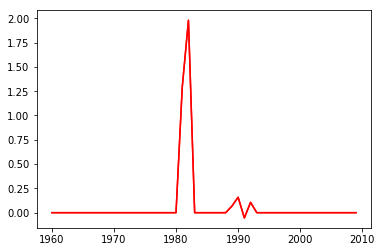

In [12]:
plt.plot(data['AZ']['ABICB'], color='red')
plt.show()

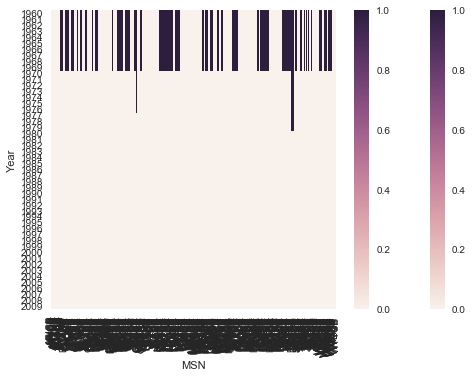

In [16]:
sns.heatmap(data['AZ'].isnull())
plt.show()

In [17]:
variables[variables['MSN'] == 'PAACK']

,MSN,Description,Unit,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
401,PAACK,Factor for converting all petroleum products c...,Million Btu per barrel,NaN,NaN,NaN,NaN


In [18]:
energy_data[energy_data['MSN'] == 'PAACK']

,MSN,StateCode,Year,Data
